In [10]:
import psycopg2 as p
from postgres_password import password
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import psycopg2
from matplotlib import pylab
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as stats
import pylab as pl

In [11]:
# Importing the SQL database into Pandas
conn=p.connect(f"dbname=deneme101 user=postgres host=localhost password={password}")
salaries_table = pd.read_sql("SELECT * FROM salaries", conn)
title_table= pd.read_sql("SELECT * FROM titles", conn)

In [19]:
# Run query
df_s = pd.read_sql_query('''SELECT t.title, s.salary
FROM titles AS t
INNER JOIN salaries AS s ON t.emp_no = s.emp_no''', conn)

# Display data
df_s.head()

,title,salary
0,Senior Engineer,60117
1,Senior Staff,78228
2,Staff,78228
3,Engineer,72488
4,Staff,42365


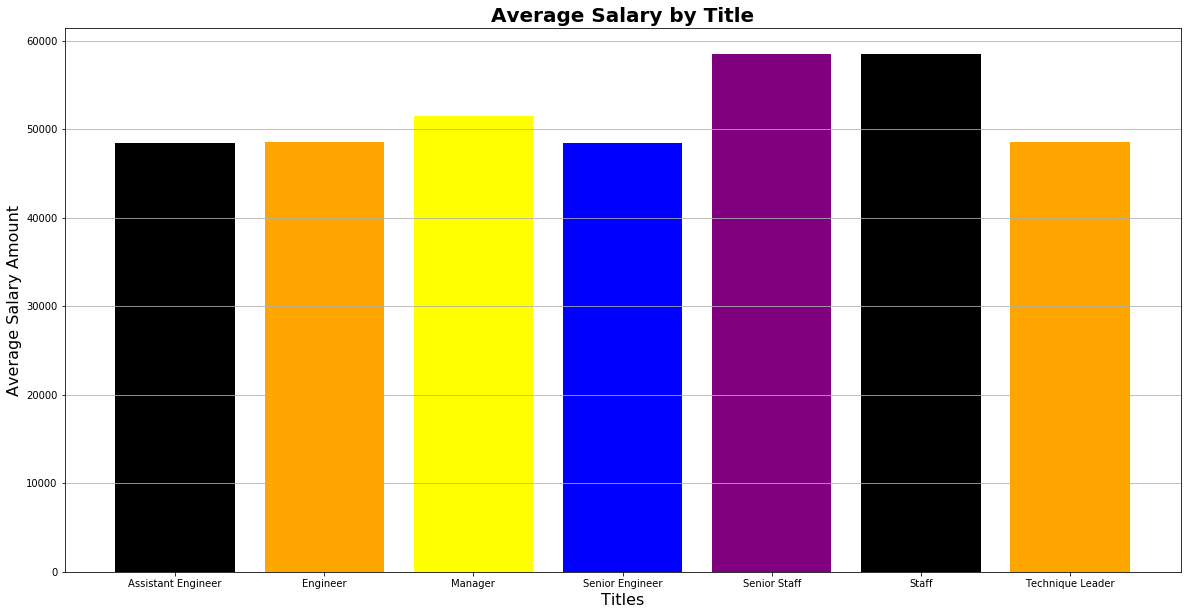

In [20]:
# Count the total number of salaries by title category
total_count_df = df_s.groupby(['title']).count()

# Find average salaries by title category
avg_count_df = round(df_s.groupby(['title']).mean())

# Drop index
avg_data = avg_count_df.reset_index()

# Design Bar chart size
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Create horizontal grid
ax.xaxis.grid(True)
pylab.grid()

# Create title and labels for x and y axis 
plt.bar(avg_data.title, avg_data.salary, color= ['black', 'orange', 'yellow', 'blue', 'purple'] )
plt.xlabel("Titles", fontsize=16)
plt.ylabel("Average Salary Amount", fontsize=16)

# Show chart
plt.show()

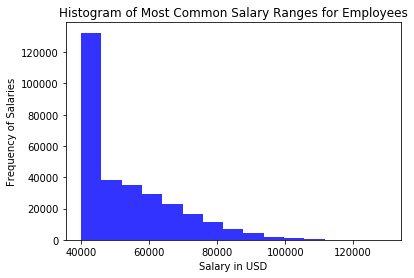

In [21]:
x = salaries_table["salary"]
num_bins = 15
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.8)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency of Salaries')
plt.title('Histogram of Most Common Salary Ranges for Employees')
plt.show()